<a href="https://colab.research.google.com/github/mayfluf/projetos-tainah-pand/blob/main/Projeto_Pandas_Funcionarios_Com_Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: Análise de Funcionários com Pandas
Este notebook realiza uma série de análises utilizando a biblioteca Pandas sobre uma base de dados de funcionários.

In [1]:
import pandas as pd
from datetime import datetime

## Leitura da Base de Dados

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSpCW9yMoUMQ4tknj5Lg_TYVfIC3P9KoVPPqlJKsBu2HzGaC579yCp9Ohxni2ncY-xyLfugXan9K6yf/pub?gid=636707205&single=true&output=csv')
df.head()

,ID,Nome,Idade,Salário,Cargo,Departamento,Data de Contratação,Avaliação de Desempenho
0,1,Juan,42.0,9276.79,Florista,Financeiro,2024-03-01,3.6
1,2,Isabelly,65.0,NaN,NaN,Operações,2023-04-04,6.3
2,3,Cauê,35.0,3692.61,Lutador de jiu-jitsu,NaN,2022-07-28,5.7
3,4,Theo,34.0,2092.81,DJ,Operações,NaN,1.5
4,5,Pedro Miguel,47.0,5944.17,Neurocirurgião,RH,2024-06-06,6.2


## 01 - Quantos registros existem na base de dados?

In [3]:
print('Total de registros:', df.shape[0])

Total de registros: 50


## 02 - Quantos registros têm informações completas (sem valores ausentes)?

In [4]:
print('Registros completos:', df.dropna().shape[0])

Registros completos: 29


## 03 - Substituir valores ausentes na coluna 'Salário' pela média

In [5]:
media_salarial = df['Salário'].mean()
df['Salário'] = df['Salário'].fillna(media_salarial)
print('Nova média salarial:', df['Salário'].mean())

Nova média salarial: 5865.925111111112


## 04 - Substituir 'TI' por 'Tecnologia da Informação'

In [6]:
df['Departamento'] = df['Departamento'].replace('TI', 'Tecnologia da Informação')

## 05 - Qual é o salário mais alto e quem o recebe?

In [7]:
salario_max = df['Salário'].max()
print(df[df['Salário'] == salario_max])

    ID  Nome  Idade  Salário       Cargo Departamento Data de Contratação  \
23  24  João    NaN  9911.71  Cozinheira    Marketing          2021-12-24   

    Avaliação de Desempenho  
23                      3.4  


## 06 - Quantos funcionários estão no departamento de Marketing?

In [8]:
print('Funcionários em Marketing:', df[df['Departamento'] == 'Marketing'].shape[0])

Funcionários em Marketing: 10


## 07 - Idade média dos funcionários por departamento

In [9]:
df.groupby('Departamento')['Idade'].mean()

,Idade
Departamento,
Financeiro,47.500000
Marketing,41.555556
Operações,43.333333
RH,39.928571
Tecnologia da Informação,44.857143


## 08 - Cargos únicos presentes na base

In [10]:
df['Cargo'].unique()

array(['Florista', nan, 'Lutador de jiu-jitsu', 'DJ', 'Neurocirurgião',
       'Ginecologista', 'Bedel', 'Lubrificador de máquinas',
       'Jogador de futebol', 'Piloto de avião', 'Cameraman',
       'Odontologista estético', 'Moldureiro', 'Dublador', 'Bioquímico',
       'Traumatologista', 'Instrumentista musical', 'Cartunista',
       'Tecnólogo em automação industrial', 'Balconista', 'Cantor',
       'Cozinheira', 'Tecnólogo em rochas ornamentais', 'Taxista',
       'Moleiro', 'Protético dentário', 'Pianista', 'Cinegrafista',
       'Intérprete de Bíblias', 'Carnavalesco', 'Geógrafo', 'Empacotador',
       'Ator', 'Imunologista', 'Quiropraxista', 'Ferroviário',
       'Publicitário', 'Segurança particular', 'Comerciante',
       'Artista de circo', 'Capitão', 'Jogador de handebol', 'Figurante',
       'Telegrafista', 'Judoca', 'Ortoptista', 'Garçom'], dtype=object)

## 09 - Criar coluna 'Tempo na Empresa'

In [11]:
df['Data de Contratação'] = pd.to_datetime(df['Data de Contratação'])
df['Tempo na Empresa'] = datetime.now().year - df['Data de Contratação'].dt.year
df[['Nome', 'Tempo na Empresa']].head()

,Nome,Tempo na Empresa
0,Juan,1.0
1,Isabelly,2.0
2,Cauê,3.0
3,Theo,NaN
4,Pedro Miguel,1.0


## 10 - Top 5 funcionários com mais tempo de empresa

In [12]:
df.sort_values(by='Tempo na Empresa', ascending=False)[['Nome', 'Tempo na Empresa']].head()

,Nome,Tempo na Empresa
5,Emilly,5.0
10,NaN,5.0
29,Alice,5.0
20,Isaac,5.0
21,Ana Sophia,5.0


## 11 - Funcionários com desempenho avaliado acima de 8

In [13]:
df[df['Avaliação de Desempenho'] > 8].shape[0]

12

## 12 - Salário total por departamento

In [14]:
df.groupby('Departamento')['Salário'].sum()

,Salário
Departamento,
Financeiro,42526.100000
Marketing,66885.370222
Operações,52666.850222
RH,79870.290000
Tecnologia da Informação,42171.075111


## 13 - 5 funcionários mais jovens

In [15]:
df.sort_values(by='Idade')[['Nome', 'Idade']].head()

,Nome,Idade
5,Emilly,19.0
37,Marcos Vinicius,21.0
12,Pedro Miguel,23.0
14,NaN,23.0
45,Diogo,23.0


## 14 - Registros sem salário

In [16]:
df[df['Salário'].isnull()]

,ID,Nome,Idade,Salário,Cargo,Departamento,Data de Contratação,Avaliação de Desempenho,Tempo na Empresa


## 15 - Categoria de Salário

In [17]:
bins = [0, 3000, 7000, float('inf')]
labels = ['Baixo', 'Médio', 'Alto']
df['Categoria de Salário'] = pd.cut(df['Salário'], bins=bins, labels=labels)
df[['Nome', 'Salário', 'Categoria de Salário']].head()

,Nome,Salário,Categoria de Salário
0,Juan,9276.790000,Alto
1,Isabelly,5865.925111,Médio
2,Cauê,3692.610000,Médio
3,Theo,2092.810000,Baixo
4,Pedro Miguel,5944.170000,Médio


## 16 - Desempenho Simplificado com map

In [18]:
def simplificar_desempenho(valor):
    if valor <= 3:
        return 'Baixo'
    elif valor <= 7:
        return 'Médio'
    return 'Alto'

df['Desempenho Simplificado'] = df['Avaliação de Desempenho'].map(simplificar_desempenho)
df[['Nome', 'Avaliação de Desempenho', 'Desempenho Simplificado']].head()

,Nome,Avaliação de Desempenho,Desempenho Simplificado
0,Juan,3.6,Médio
1,Isabelly,6.3,Médio
2,Cauê,5.7,Médio
3,Theo,1.5,Baixo
4,Pedro Miguel,6.2,Médio


## 17 - Idade em 5 anos

In [19]:
df['Idade em 5 Anos'] = df['Idade'].apply(lambda x: x + 5)
df[['Nome', 'Idade', 'Idade em 5 Anos']].head()

,Nome,Idade,Idade em 5 Anos
0,Juan,42.0,47.0
1,Isabelly,65.0,70.0
2,Cauê,35.0,40.0
3,Theo,34.0,39.0
4,Pedro Miguel,47.0,52.0


## 18 - Funcionários na categoria de salário 'Alto'

In [20]:
df[df['Categoria de Salário'] == 'Alto'].shape[0]

14

## 19 - Excluir registros com valores ausentes e salvar em CSV

In [21]:
df.dropna().to_csv('funcionarios_limpo.csv', index=False)

## 20 - Casting da coluna 'Avaliação de Desempenho' para inteiro

In [22]:
df['Avaliação de Desempenho'] = df['Avaliação de Desempenho'].astype(int)
df.dtypes

,0
ID,int64
Nome,object
Idade,float64
Salário,float64
Cargo,object
Departamento,object
Data de Contratação,datetime64[ns]
Avaliação de Desempenho,int64
Tempo na Empresa,float64
Categoria de Salário,category


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## 🎨 Gráfico 1 - Distribuição de Salários

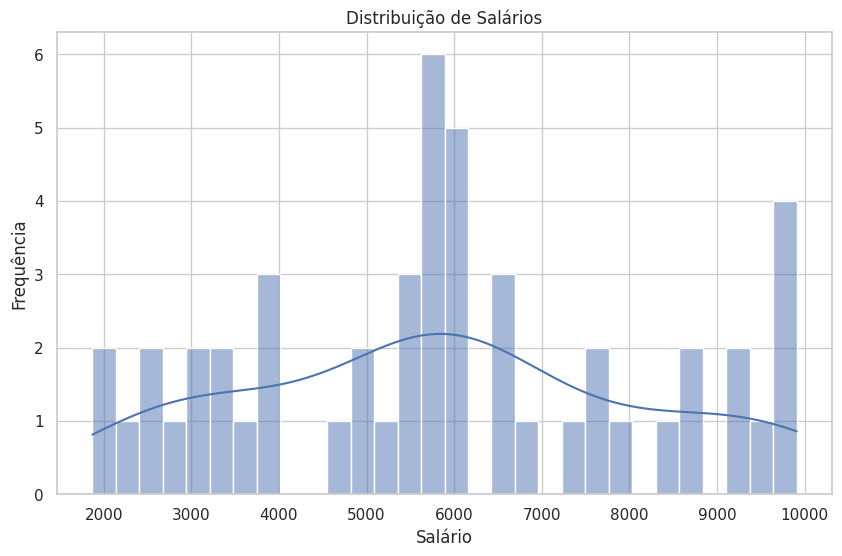

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salário'], bins=30, kde=True)
plt.title('Distribuição de Salários')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show()

## 🧑‍💼 Gráfico 2 - Funcionários por Departamento

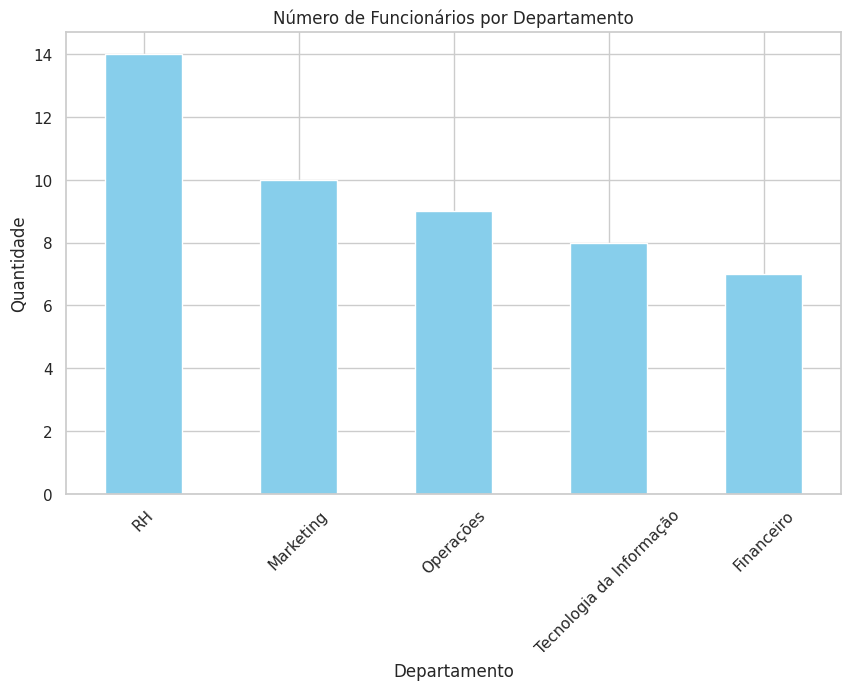

In [25]:
plt.figure(figsize=(10, 6))
df['Departamento'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Número de Funcionários por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

## 📈 Gráfico 3 - Média Salarial por Departamento

<ipython-input-26-0f16aa2647cc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Departamento'], y=df['Salário'], estimator='mean', ci=None, palette='viridis')
<ipython-input-26-0f16aa2647cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Departamento'], y=df['Salário'], estimator='mean', ci=None, palette='viridis')


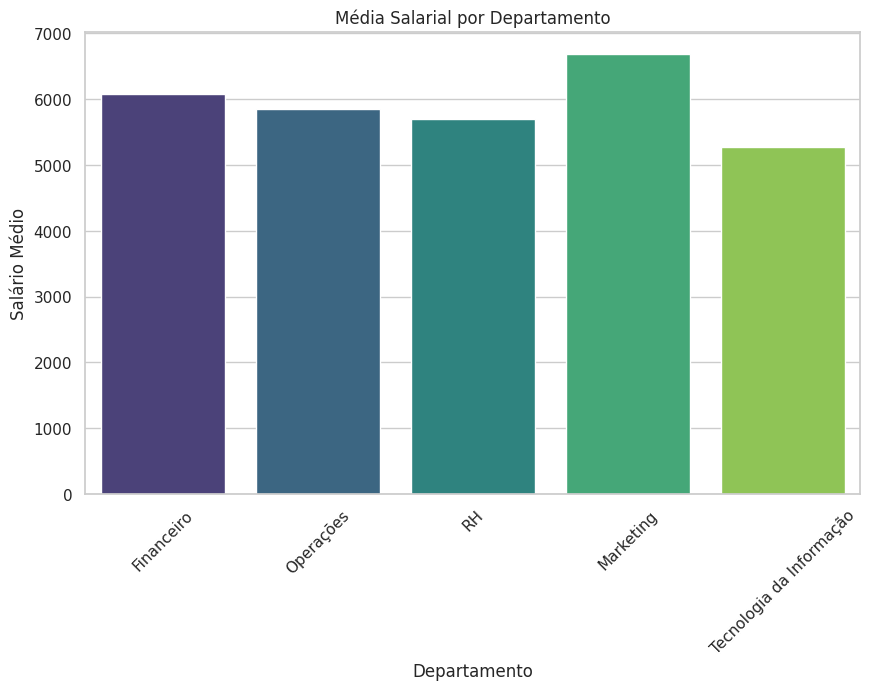

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Departamento'], y=df['Salário'], estimator='mean', ci=None, palette='viridis')
plt.title('Média Salarial por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Salário Médio')
plt.xticks(rotation=45)
plt.show()

## 🎯 Gráfico 4 - Avaliação de Desempenho

<ipython-input-27-1a92a33a122c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Avaliação de Desempenho', data=df, palette='pastel')


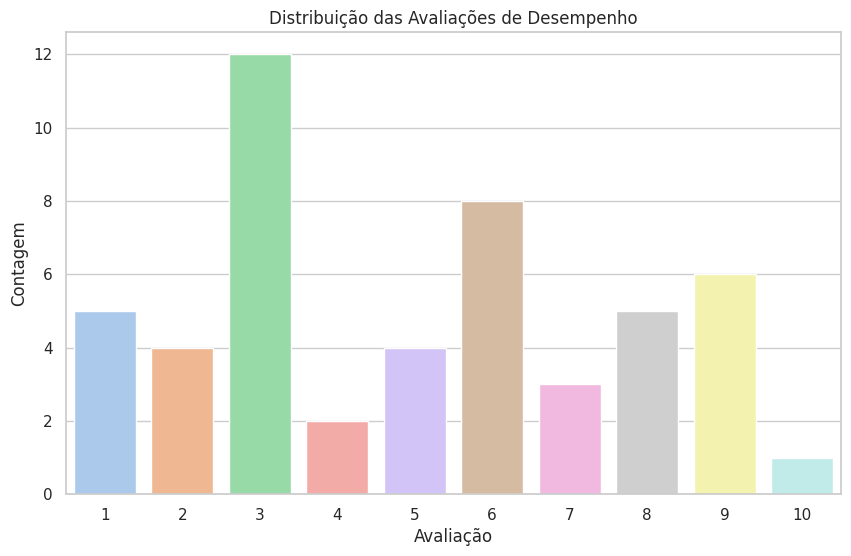

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Avaliação de Desempenho', data=df, palette='pastel')
plt.title('Distribuição das Avaliações de Desempenho')
plt.xlabel('Avaliação')
plt.ylabel('Contagem')
plt.show()

## ⏳ Gráfico 5 - Top 10 Funcionários com mais Tempo de Empresa

<ipython-input-28-50afc60f8ba0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tempo na Empresa', y='Nome', data=top10, palette='magma')


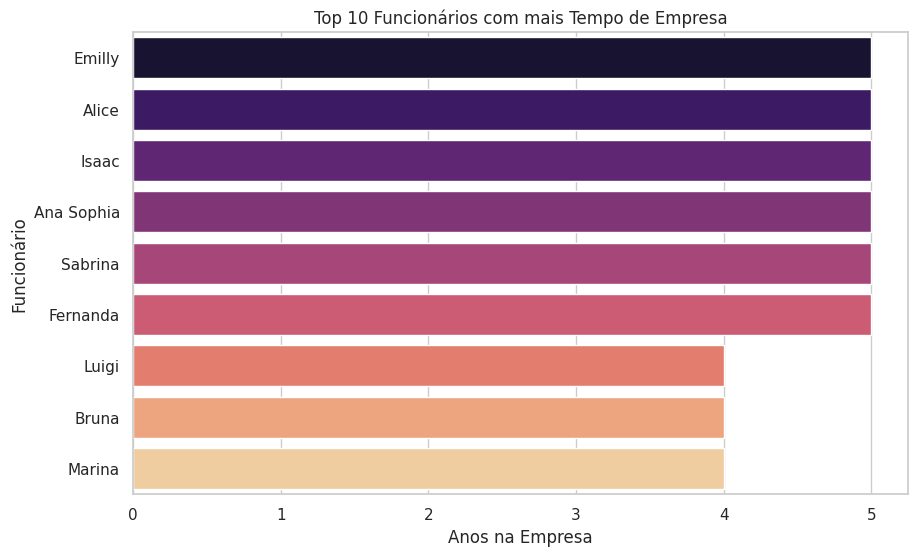

In [28]:
top10 = df.sort_values(by='Tempo na Empresa', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Tempo na Empresa', y='Nome', data=top10, palette='magma')
plt.title('Top 10 Funcionários com mais Tempo de Empresa')
plt.xlabel('Anos na Empresa')
plt.ylabel('Funcionário')
plt.show()